### 01 - Assignment model
- Operations Reserach - Hillier Liberman 7th Edition (page 381)

In [1]:
# First, import packages
import pandas as pd
from IPython.display import Image 
import gurobipy as gp
from gurobipy import GRB

# Define a gurobipy model for the decision problem
model = gp.Model('assignment')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-29


### Problem Statement
The JOB SHOP COMPANY has purchased three new machines of different types. There are 
four available locations in the shop where a machine could be installed. Some of these 
locations are more desirable than others for particular machines because of their proximity 
to work centers that will have a heavy work flow to and from these machines. 
(There will be no work flow between the new machines.) 

Therefore, the objective is to assign the new machines to the available locations to minimize the total 
cost of materials handling. The estimated cost in dollars per hour of materials handling involving each 
of the machines is given in Table 8.24 for the respective locations. Location 2 is not considered suitable 
for machine 2, so no cost is given for this case.



### Sets and Define Model
Our sets are:
- $M = \{\texttt{'M1', 'M2', 'M3'}\} \quad\quad\quad\quad\quad\quad\quad\space \texttt{machine}$
- $L = \{\texttt{'L1', 'L2', 'L3', 'L4'}\} \quad\quad\quad\space\space\space\space\space\space\space\space\space\space\space\space \texttt{location}$

To index each set, we'll use the lowercase letter of each set. Letters used for sets and indices are up to you. Typically, capital letters are for sets and corresponding lowercase will be the index. Single letters are used mainly for conciseness.

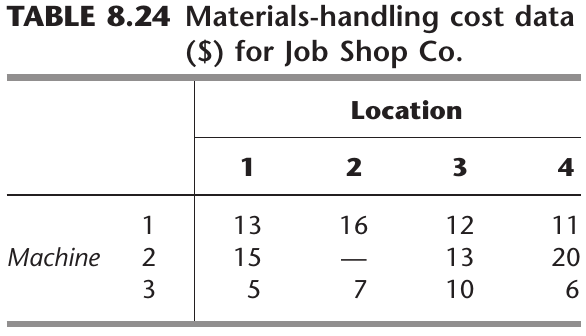

In [2]:
# Table: Materials-handling cost data ($) for Job Shop Co. 
Image("824.png", width=250, height=150) 

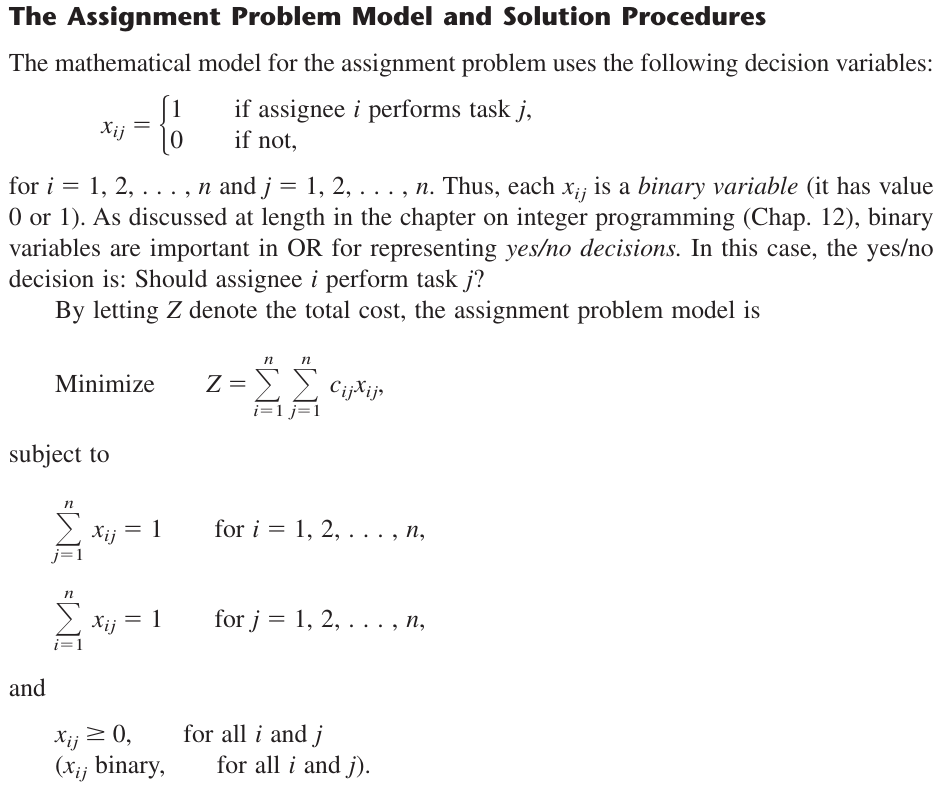

In [3]:
# Table: Assignment Problem - Math Model. 
Image("assignment.png", width=600, height=400) 

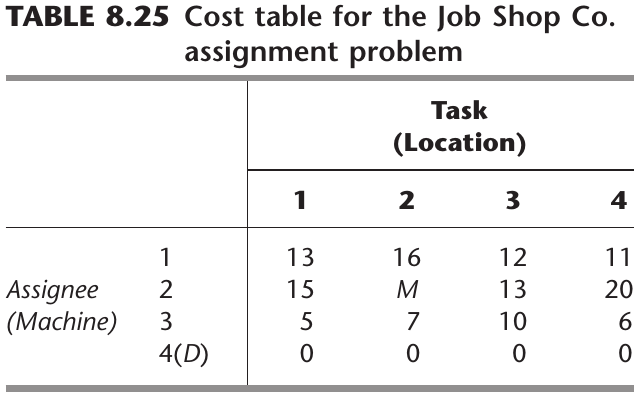

In [4]:
# Table: Cost table for the Job Shop Co.(Assignment Problem) 
Image("825.png", width=250, height=150) 

In [5]:
# Sets M and L, respectively
# When we code sets we can be more descriptive in the name
machine = ['M1','M2','M3','M4']         # M4 dummy machine - M should be equal to L for assignment problem
location = ['L1','L2','L3','L4']

### Decision Variable


\begin{equation}
x_{ij} = \begin{cases}
1 & \text{if assignee $i$ performs task } j \\
0 & \text{otherwise}
\end{cases}
\end{equation}


In [8]:
# Method - 01: To define the variables

# Provide each set for the indices
model = gp.Model('assignment')
x = model.addVars(machine, location, vtype=GRB.BINARY, name = 'x')
model.update()
x

{('M1', 'L1'): <gurobi.Var x[M1,L1]>,
 ('M1', 'L2'): <gurobi.Var x[M1,L2]>,
 ('M1', 'L3'): <gurobi.Var x[M1,L3]>,
 ('M1', 'L4'): <gurobi.Var x[M1,L4]>,
 ('M2', 'L1'): <gurobi.Var x[M2,L1]>,
 ('M2', 'L2'): <gurobi.Var x[M2,L2]>,
 ('M2', 'L3'): <gurobi.Var x[M2,L3]>,
 ('M2', 'L4'): <gurobi.Var x[M2,L4]>,
 ('M3', 'L1'): <gurobi.Var x[M3,L1]>,
 ('M3', 'L2'): <gurobi.Var x[M3,L2]>,
 ('M3', 'L3'): <gurobi.Var x[M3,L3]>,
 ('M3', 'L4'): <gurobi.Var x[M3,L4]>,
 ('M4', 'L1'): <gurobi.Var x[M4,L1]>,
 ('M4', 'L2'): <gurobi.Var x[M4,L2]>,
 ('M4', 'L3'): <gurobi.Var x[M4,L3]>,
 ('M4', 'L4'): <gurobi.Var x[M4,L4]>}

In [9]:
# Method - 02: To define the variables

# Loop through each p and d combination to create a decision variable
model = gp.Model('assignment')
x = {}
for m in machine:
    for l in location:
        x[m,l] = model.addVar(vtype=GRB.BINARY, name = m+"_to_"+l)
model.update()
x

{('M1', 'L1'): <gurobi.Var M1_to_L1>,
 ('M1', 'L2'): <gurobi.Var M1_to_L2>,
 ('M1', 'L3'): <gurobi.Var M1_to_L3>,
 ('M1', 'L4'): <gurobi.Var M1_to_L4>,
 ('M2', 'L1'): <gurobi.Var M2_to_L1>,
 ('M2', 'L2'): <gurobi.Var M2_to_L2>,
 ('M2', 'L3'): <gurobi.Var M2_to_L3>,
 ('M2', 'L4'): <gurobi.Var M2_to_L4>,
 ('M3', 'L1'): <gurobi.Var M3_to_L1>,
 ('M3', 'L2'): <gurobi.Var M3_to_L2>,
 ('M3', 'L3'): <gurobi.Var M3_to_L3>,
 ('M3', 'L4'): <gurobi.Var M3_to_L4>,
 ('M4', 'L1'): <gurobi.Var M4_to_L1>,
 ('M4', 'L2'): <gurobi.Var M4_to_L2>,
 ('M4', 'L3'): <gurobi.Var M4_to_L3>,
 ('M4', 'L4'): <gurobi.Var M4_to_L4>}

In [10]:
# Load cost data thorough dictionary command
cost = {    
    ('M1', 'L1'): 13,
    ('M1', 'L2'): 16,
    ('M1', 'L3'): 12,
    ('M1', 'L4'): 11,
    ('M2', 'L1'): 15,
    ('M2', 'L2'): 1000,
    ('M2', 'L3'): 13,
    ('M2', 'L4'): 20,
    ('M3', 'L1'): 5,
    ('M3', 'L2'): 7,
    ('M3', 'L3'): 10,
    ('M3', 'L4'): 6,
    ('M4', 'L1'): 0.0,
    ('M4', 'L2'): 0.0,
    ('M4', 'L3'): 0.0,
    ('M4', 'L4'): 0.0
}

In [11]:
# Method - 03: To define the variables
# The index of the assignment costs have each combination of machine and location
model = gp.Model('assignment')
x = model.addVars(cost, vtype=GRB.BINARY, name = 'assignment_cost')
model.update()
x

{('M1', 'L1'): <gurobi.Var assignment_cost[M1,L1]>,
 ('M1', 'L2'): <gurobi.Var assignment_cost[M1,L2]>,
 ('M1', 'L3'): <gurobi.Var assignment_cost[M1,L3]>,
 ('M1', 'L4'): <gurobi.Var assignment_cost[M1,L4]>,
 ('M2', 'L1'): <gurobi.Var assignment_cost[M2,L1]>,
 ('M2', 'L2'): <gurobi.Var assignment_cost[M2,L2]>,
 ('M2', 'L3'): <gurobi.Var assignment_cost[M2,L3]>,
 ('M2', 'L4'): <gurobi.Var assignment_cost[M2,L4]>,
 ('M3', 'L1'): <gurobi.Var assignment_cost[M3,L1]>,
 ('M3', 'L2'): <gurobi.Var assignment_cost[M3,L2]>,
 ('M3', 'L3'): <gurobi.Var assignment_cost[M3,L3]>,
 ('M3', 'L4'): <gurobi.Var assignment_cost[M3,L4]>,
 ('M4', 'L1'): <gurobi.Var assignment_cost[M4,L1]>,
 ('M4', 'L2'): <gurobi.Var assignment_cost[M4,L2]>,
 ('M4', 'L3'): <gurobi.Var assignment_cost[M4,L3]>,
 ('M4', 'L4'): <gurobi.Var assignment_cost[M4,L4]>}

### Constraints

In [12]:
# Constraint 1: Each machine should be assigned to a single location.
c1 = model.addConstrs((gp.quicksum(x[m,l] for l in location) == 1 for m in machine), "c1")
model.update()
c1

{'M1': <gurobi.Constr c1[M1]>,
 'M2': <gurobi.Constr c1[M2]>,
 'M3': <gurobi.Constr c1[M3]>,
 'M4': <gurobi.Constr c1[M4]>}

In [13]:
# Constraint 2: Each location can have only one machine.
c2 = model.addConstrs((gp.quicksum(x[m,l] for m in machine) == 1 for l in location), "c2")
model.update()
c2

{'L1': <gurobi.Constr c2[L1]>,
 'L2': <gurobi.Constr c2[L2]>,
 'L3': <gurobi.Constr c2[L3]>,
 'L4': <gurobi.Constr c2[L4]>}

### Objective Function

In [14]:
model.setObjective(gp.quicksum(cost[m,l]*x[m,l] for m in machine for l in location), GRB.MINIMIZE)

## Find, Extract, and Analyze the Solution
Before running the optimization, it is a good idea to write an `lp` file. This is a text file that prints out the variables, constraints, and object like we would see in the *formulation*, just without the summation symbols and using the names we designated.

In [15]:
model.write('assignment.lp')

In [16]:
model.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Linux Mint 21.3")

CPU model: AMD Ryzen 5 5600G with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0x8cfe9ef7
Variable types: 0 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 34.0000000
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 8 rows, 15 columns, 30 nonzeros
Variable types: 0 continuous, 15 integer (15 binary)

Root relaxation: objective 2.900000e+01, 5 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0     

In [ ]:
# Print results
for v in model.getVars():
    print(f"{v.VarName} {v.X:g}")

print(f"Obj: {model.ObjVal:g}")

------------------------------------------

### 02 - Assignment model
- Operations Reserach - Hillier Liberman 7th Edition (page 386)

In [18]:
# First, import packages
import pandas as pd
from IPython.display import Image 
import gurobipy as gp
from gurobipy import GRB

# Define a gurobipy model for the decision problem
model = gp.Model('assignment')

In [19]:
# First, import packages
import pandas as pd
from IPython.display import Image 
import gurobipy as gp
from gurobipy import GRB

# Define a gurobipy model for the decision problem
model = gp.Model('assignment2')

### Problem Statement
The BETTER PRODUCTS COMPANY has decided to initiate the production of four new
products, using three plants that currently have excess production capacity. The products
require a comparable production effort per unit, so the available production capacity of
the plants is measured by the number of units of any product that can be produced per
day, as given in the rightmost column of Table 8.27. The bottom row gives the required
production rate per day to meet projected sales. Each plant can produce any of these products, 
except that Plant 2 cannot produce product 3. However, the variable costs per unit
of each product differ from plant to plant, as shown in the main body of Table 8.27.


### Sets and Define Model
Our sets are:
- $F = \{\texttt{'F1', 'F2', 'F3'}\} \quad\quad\quad\quad\quad\quad\quad\space\space \texttt{factory}$
- $P = \{\texttt{'P1', 'P2', 'P3', 'P4'}\} \quad\quad\quad\space\space\space\space\space\space\space\space\space\space\space\space \texttt{product}$


#### Note: 
We use $F$ (Plants/Factories) for plants to distinguish between plants and products.

In [29]:
# Sets F and P, respectively
# When we code sets we can be more descriptive in the name
factory = ['F1','F2','F3']         
product = ['P1','P2','P3','P4']

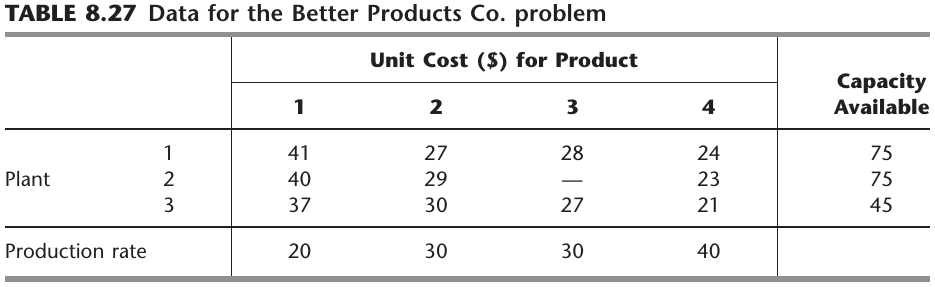

In [30]:
# Table: Materials-handling cost data ($) for Job Shop Co. 
Image("827.png", width=450, height=250) 

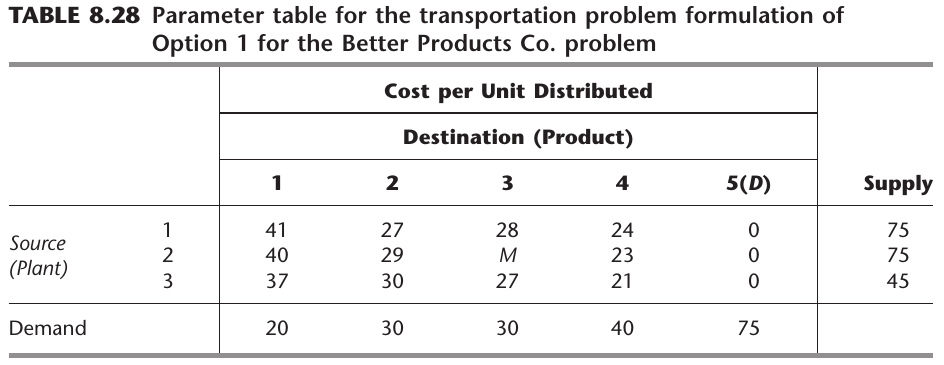

In [31]:
# Table: Special case: When supply and demand are not equal 
Image("828.png", width=450, height=250) 

In [32]:
# Cost data for the Better Products Co. problem
cost = {    
    ('F1', 'P1'): 41,
    ('F1', 'P2'): 27,
    ('F1', 'P3'): 28,
    ('F1', 'P4'): 24,
    ('F2', 'P1'): 40,
    ('F2', 'P2'): 29,
    ('F2', 'P3'): 1000,
    ('F2', 'P4'): 23,
    ('F3', 'P1'): 37,
    ('F3', 'P2'): 30,
    ('F3', 'P3'): 27,
    ('F3', 'P4'): 21
}

In [38]:
# Read transportation cost data between factory and depot
data = pd.read_csv('./assignment_cost.csv', index_col=[0,1])

# Use squeeze=True to make the costs a series
cost = data.squeeze()
cost

factory  product
F1       P1           41
         P2           27
         P3           28
         P4           24
F2       P1           40
         P2           29
         P3         1000
         P4           23
F3       P1           37
         P2           30
         P3           27
         P4           21
Name: cost, dtype: int64

In [39]:
data

cost
factory product      
F1      P1         41
        P2         27
        P3         28
        P4         24
F2      P1         40
        P2         29
        P3       1000
        P4         23
F3      P1         37
        P2         30
        P3         27
        P4         21

In [43]:
# Method - 01: To define the variables

# Provide each set for the indices
x = model.addVars(factory, product, vtype=GRB.INTEGER, name = 'x')
model.update()
x

{('F1', 'P1'): <gurobi.Var x[F1,P1]>,
 ('F1', 'P2'): <gurobi.Var x[F1,P2]>,
 ('F1', 'P3'): <gurobi.Var x[F1,P3]>,
 ('F1', 'P4'): <gurobi.Var x[F1,P4]>,
 ('F2', 'P1'): <gurobi.Var x[F2,P1]>,
 ('F2', 'P2'): <gurobi.Var x[F2,P2]>,
 ('F2', 'P3'): <gurobi.Var x[F2,P3]>,
 ('F2', 'P4'): <gurobi.Var x[F2,P4]>,
 ('F3', 'P1'): <gurobi.Var x[F3,P1]>,
 ('F3', 'P2'): <gurobi.Var x[F3,P2]>,
 ('F3', 'P3'): <gurobi.Var x[F3,P3]>,
 ('F3', 'P4'): <gurobi.Var x[F3,P4]>}

In [44]:
factory_capacity = pd.Series([75, 75, 45], index = factory, name = "Capacity Available")
factory_capacity.to_frame()
#factory_capacity

,Capacity Available
F1,75
F2,75
F3,45


In [45]:
prod_rate = pd.Series([20, 30, 30, 40], index = product, name = "Production Rate")
prod_rate.to_frame()
#factory_capacity

,Production Rate
P1,20
P2,30
P3,30
P4,40


In [46]:
# Constraint 01: Factory Capacity constraint
c1 = model.addConstrs(gp.quicksum(x[f,p] for p in product) <= factory_capacity[f] for f in factory)
model.update()
c1

{'F1': <gurobi.Constr R0>, 'F2': <gurobi.Constr R1>, 'F3': <gurobi.Constr R2>}

In [47]:
# Constraint 02: Production rate constraint
c2 = model.addConstrs(gp.quicksum(x[f,p] for f in factory) <= prod_rate[p] for p in product)
model.update()
c2

{'P1': <gurobi.Constr R3>,
 'P2': <gurobi.Constr R4>,
 'P3': <gurobi.Constr R5>,
 'P4': <gurobi.Constr R6>}

In [48]:
# Update the model
model.update()

### Objective Function

In [49]:
model.setObjective(gp.quicksum(cost[f,p]*x[f,p] for f in factory for p in product), GRB.MINIMIZE)

In [50]:
model.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Linux Mint 21.3")

CPU model: AMD Ryzen 5 5600G with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 7 rows, 63 columns and 24 nonzeros
Model fingerprint: 0x178ed57c
Variable types: 0 continuous, 63 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 1e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 8e+01]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


In [ ]:
max_prod = pd.Series([180,200,140,80,180], index = production, name = "max_production")
n_demand = pd.Series([89,95,121,101,116,181], index = distribution, name = "demand")
max_prod.to_frame()
#n_demand.to_frame()

In [ ]:
# Use squeeze=True to make the costs a series
path = 'https://raw.githubusercontent.com/Gurobi/modeling-examples/master/optimization101/Modeling_Session_1/'
data = pd.read_csv(path + 'cost.csv', index_col=[0,1])
transp_cost = data.squeeze()

In [ ]:
type(transp_cost)

In [ ]:
# Pivot to view the costs a bit easier
transp_cost.reset_index().pivot(index='production', columns='distribution', values='cost')

### Assignment model

Parameters of a math optimization problem are values treated as constants in the model and are associated with the decision variables. For this decision problem these values are the limits of each production facility, the demand for each distribution center, and the pairwise costs between production and distribution locations.

- $m_p$ is the max production in location $p$, $\forall p \in P \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\space\space \texttt{max}\_\texttt{prod[p]}$
- $n_d$ is the number of customers for a distribution center $d$, $\forall d \in D \quad\quad\quad\quad\quad\quad\quad\quad \texttt{n}\_\texttt{demand[d]}$
- $c_{p,d}$ is the cost to ship a widget between location $p$ and location $d$, $\forall p \in P, d \in D \quad\quad\quad \texttt{cost[p,d]}$

We also have the requirement that each production facility needs to produce at 75% of this maximum output. We'll denote this value by $a$ in the formulation "frac" for the fraction of maximum production required. Initially we set $a = 0.75$.

In [ ]:
frac = 0.75

The command `m.update()` updates the model to include any changes that have been made, like adding variables. It doesn't need to be run in every cell but if you see *Awaiting Model Update* in the output of a cell, then this should prevent that from happening.

Next we have the maximum number of widgets each production facility can make. We also have that each facility must make at least 75% of its max production.

$$
\begin{align*}
\sum_{d}x_{p,d} &\le m_p, &\forall p \in P \quad\quad &\texttt{can}\_\texttt{produce[p]}\\
\sum_{d}x_{p,d} &\ge a*m_p,&\forall p \in P \quad\quad &\texttt{must}\_\texttt{produce[p]}\\
\end{align*}
$$


In [ ]:
can_produce = m.addConstrs((gp.quicksum(x[p,d] for d in distribution) <= max_prod[p] for p in production), name = 'can_produce')# (x.sum(i, '*')
must_produce = m.addConstrs((gp.quicksum(x[p,d] for d in distribution) >= frac*max_prod[p] for p in production), name = 'must_produce')
m.update()
can_produce

### Run the Optimization

### Extract the Solution
There are many ways to get the values of decision variables out of gurobipy.

Here are a couple of other ways to get the solution.

You can only iterate over a specific variable and only return values that are of interest to you. Remember, x is a dict in python. So, iterate over it, the same way you iterate over any dictionary

In [ ]:
# You can get the name and value of all the decision variables:
all_vars = {v.varName: v.x for v in m.getVars()}
all_vars

In [ ]:
x_values = pd.Series(m.getAttr('X', x), name = "shipment", index = transp_cost.index)
sol = pd.concat([transp_cost, x_values], axis=1)
#sol
sol[sol.shipment > 0]

In [ ]:
xvals = {k: v.x for k,v in x.items() if v.x > 0}
xvals

In [ ]:
x_values.sum(), n_demand.sum()

### Solution Analysis
While determining the optimal transportation of widgets was our goal, we may want to dig a little deeper into the solution. For example we can aggregate the total production by facility to see which locations (if any) did not produce their maximum capacity of widgets and which (if any) production facilities are at the lower bound of their production.

In [ ]:
# Sum the shipment amount by production facility
ship_out = sol.groupby('production')['shipment'].sum()
pd.DataFrame({'Remaining':max_prod - ship_out, 'Utilization':ship_out/max_prod})

In mathematical optimization, when the left-hand and right-hand sides of an inequality constraint are equal, we say the constraint is `binding`. When this *doesn't happen* then there is `slack` or `surplus` in that constraint. We can get this value by calling the `Slack` attribute of a constraint.

In [ ]:
pd.DataFrame({'Remaining':[can_produce[p].Slack for p in production],
              'Utilization':[1-can_produce[p].Slack/max_prod[p] for p in production]},
             index = production)

# Using Binary Variables
As we described in the first session and also at the top of this notebook, binary variables are used to choose alternatives in mathematical optimization. They can be interpreted as a yes/no decision or an on/off switch.

In the original problem Birmingham's production is much lower than the rest of the facilities. Suppose we have the option to expand that facilities max capacity by either 25 or 50 widgets, but there is a cost of \\$50 and \\$75, respectively, to choose one of these options and we can choose at most one. We'll use a binary decision variable for each option named $xprod$.

Let $xprod_0 = 1$ if we choose the first option and expand production capacity by 25 and $0$ otherwise.
Let $xprod_1 = 1$ if we choose the second option and expand production capacity by 50 and $0$ otherwise.

While it's fairly common to use single lowercase letters as decision variables, it is not necessary and you'll see variables defined as above (where they are more descriptive) quite often. We will formulate a new model that contains the same decision variables and demand constraints as before.

In [ ]:
# We use m2 for the second model
# These parts are the same as above outside of the new model name
m2 = gp.Model('widgets2')
x = m2.addVars(production, distribution, obj = transp_cost, name = 'prod_ship')
meet_demand = m2.addConstrs((gp.quicksum(x[p,d] for p in production) >= n_demand[d] for d in distribution), name = 'meet_demand')

In the cell above we did use new argument of the `addVars()` function: `obj`. This will set the coefficient of the added decision variables in the objective function and is equivalent to what we did earlier by attaching the transportation costs between each production and distribution location to the appropriate decision variable.  

Next, we'll add the same constraints for production limits as before for each production facility other than Birmingham. The formulation is basically the same other than the set the constraints hold for.
$$
\begin{align*}
\sum_{d}x_{p,d} &\le m_p, &\forall p \in P -\{\texttt{Birmingham}\} \\
\sum_{d}x_{p,d} &\ge a*m_p,&\forall p \in P -\{\texttt{Birmingham}\} \\
\end{align*}
$$

In gurobipy, this is done by adding a condition in the `generator` expression.

In [ ]:
can_produce = m2.addConstrs((gp.quicksum(x[p,d] for d in distribution) <= max_prod[p] for p in production if p != 'Birmingham'), name = 'can_produce')
must_produce =  m2.addConstrs((gp.quicksum(x[p,d] for d in distribution) >= frac*max_prod[p] for p in production if p != 'Birmingham'), name = 'must_produce')

Now, add the new binary variables.

In [ ]:
xprod = m2.addVars(range(2), vtype = GRB.BINARY, obj = [50, 75], name = 'expand_Birmingham_prod')

Let's breakdown each of the arguments in the cell above -- there are a few new things there.
1. `range(n)` is used to add $n$ decision variables. In this case we add 2 variables.
2. We need to declare this as a binary variable using `vtype`.
3. We again use the `obj` capability to immediately set the objective function coefficients for these variables.

The objective and new binary variables look like this in the formulation:

\begin{align*}
{\rm minimize} \space &\sum_{p,d}c_{p,d}x_{p,d} + 50*xprod_0 + 75*xprod_1, \quad &\forall p \in P, d \in D\\
&xprod_i \in \{0,1\}, &{\rm for} \space i \in \{0,1\}
\end{align*}

Next we have the production constraints that are specific to the Birmingham facility.

$$
\begin{align*}
\sum_{d}x_{p,d} &\le m_p + 25*xprod_0 + 50*xprod_1, & p = \texttt{Birmingham} \\
\sum_{d}x_{p,d} &\ge a*(m_p+ 25*xprod_0 + 50*xprod_1),& p = \texttt{Birmingham} \\
\end{align*}
$$

In [ ]:
Birmingham_max = m2.addConstr(gp.quicksum(x['Birmingham',d] for d in distribution) <= max_prod['Birmingham'] + 25*xprod[0] + 50*xprod[1], name = 'Birmingham_add_max')
Birmingham_min = m2.addConstr(gp.quicksum(x['Birmingham',d] for d in distribution) >= frac*(max_prod['Birmingham'] + 25*xprod[0] + 50*xprod[1]), name = 'Birmingham_add_min')

It was stated above that we can select at most one of the expansion options which means we cannot allow both $xprod_0$ and $xprod_1$ to equal one. To model this we add a constraint limiting the sum of these two binary variables to at most one.

$$
\begin{align*}
\sum_{i}xprod_i \le 1
\end{align*}
$$
The corresponding constraint in gurobipy:

In [ ]:
Birmingham_lim = m2.addConstr(gp.quicksum(xprod[i] for i in range(2)) <= 1, name = 'expansion_choice')

Now we can run this optimization model and see if this potential expansion will help us reduce overall costs.

In [ ]:
m2.optimize()

In [ ]:
obj1 = m.getObjective()
obj2 = m2.getObjective()
print(f"The original model had a total cost of {round(obj1.getValue(),2)}")
print(f"The new formualtion has a total cost of {round(obj2.getValue(),2)}")

What does the change in objective function value tell us?

Let's look at values of our binary variables.

In [ ]:
pd.Series(m2.getAttr('X', xprod))

The model selected the first expansion option since $xprod_0 = 1$, which was increasing production by 25 widgets in Birmingham. We can see the rest of the solution, which will include the increase in Birmingham's production capacity.

In [ ]:
x2_values = pd.Series(m2.getAttr('X', x), name = "shipment", index = transp_cost.index)
sol2 = pd.concat([transp_cost, x2_values], axis=1)
sol2[sol2.shipment > 0]

In [ ]:
m.dispose()
m2.dispose()
gp.disposeDefaultEnv()

### Homework! (not really, but something to look into)
Analyze how the optimal solution changes between the two models. You'll notice something weird.
- What is it that's odd?
- Why do you think it happened?
- How would you address it from formulation perspective and a business perspective?